In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from kitti_object import kitti_object, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes


In [2]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb(width=1920, height=1080)
vdisplay.start()
from mayavi import mlab
mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

Notebook initialized with ipy backend.


./data/object training
./data/object/training/velodyne/000000.bin
('All point num: ', 115384)
('FOV point num: ', (20285, 4))
pc_velo (20285, 4)
==================== (20285, 4)
box3d_pts_3d_velo:
[[ 8.96440459 -2.45859462 -1.60867186]
 [ 8.48444353 -2.45306157 -1.60607081]
 [ 8.49835837 -1.25324031 -1.59072653]
 [ 8.97831943 -1.25877336 -1.59332758]
 [ 8.97436611 -2.48287864  0.28114573]
 [ 8.49440505 -2.47734559  0.28374677]
 [ 8.50831989 -1.27752433  0.29909105]
 [ 8.98828095 -1.28305738  0.29649   ]]



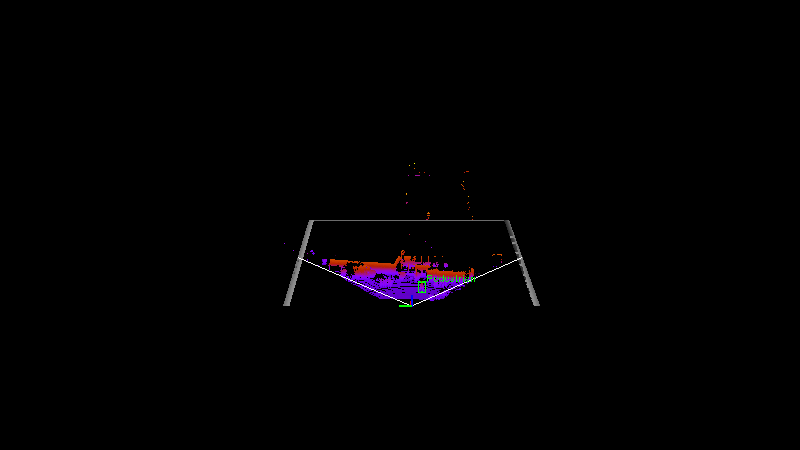

In [3]:
dataset = kitti_object('./data/object', 'training')

data_idx = 0
objects = dataset.get_label_objects(data_idx)
pc_velo = dataset.get_lidar(data_idx)
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)
img_height, img_width, _ = img.shape

fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 450))
show_lidar_with_depth(pc_velo, objects, calib, fig_3d, True, img_width, img_height)
fig_3d

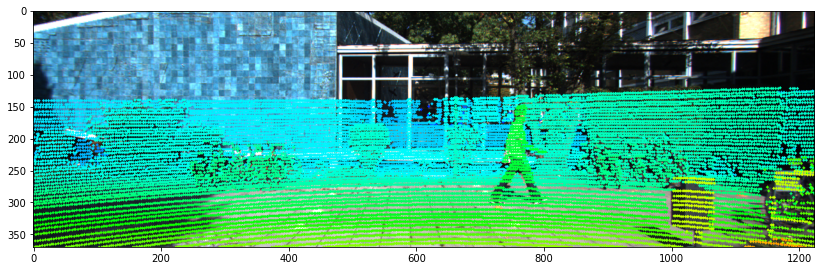

In [4]:
img_lidar = show_lidar_on_image(pc_velo[:, :3], img, calib, img_width, img_height)
img_lidar = cv2.cvtColor(img_lidar, cv2.COLOR_BGR2RGB)

fig_lidar = plt.figure(figsize=(14, 7))
ax_lidar = fig_lidar.subplots()
ax_lidar.imshow(img_lidar)
plt.show()

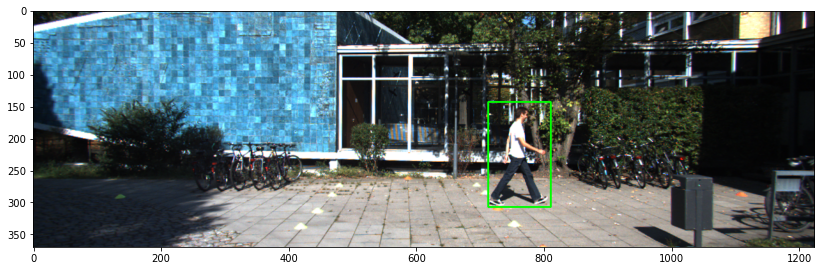

In [5]:
img_bbox2d, img_bbox3d = show_image_with_boxes(img, objects, calib)
img_bbox2d = cv2.cvtColor(img_bbox2d, cv2.COLOR_BGR2RGB)

fig_bbox2d = plt.figure(figsize=(14, 7))
ax_bbox2d = fig_bbox2d.subplots()
ax_bbox2d.imshow(img_bbox2d)
plt.show()

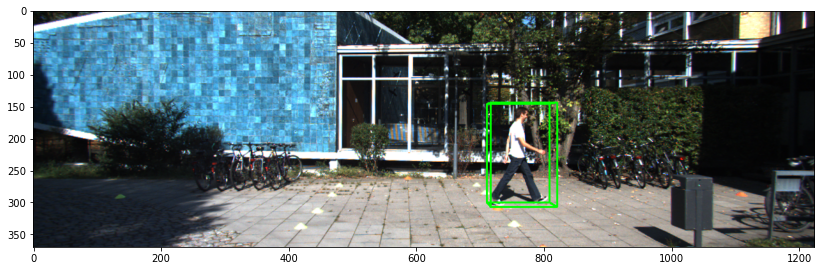

In [6]:
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

fig_bbox3d = plt.figure(figsize=(14, 7))
ax_bbox3d = fig_bbox3d.subplots()
ax_bbox3d.imshow(img_bbox3d)
plt.show()

top_image: (500, 300, 3)


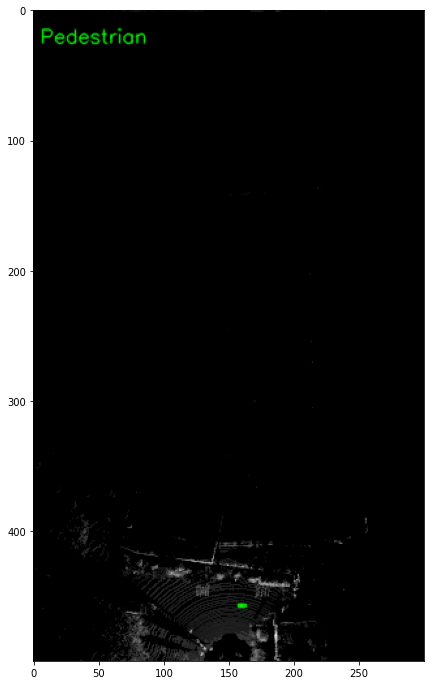

In [7]:
img_bev = show_lidar_topview_with_boxes(pc_velo, objects, calib)

fig_bev = plt.figure(figsize=(7, 14))
ax_bev = fig_bev.subplots()
ax_bev.imshow(img_bev)
plt.show()